### Filters applying Pt. 3. Laplacian filter.

Laplacian filter it is a simple edge detection algorithm.
The Laplacian is often applied to an image that has first been smoothed with something approximating a Gaussian smoothing filter in order to reduce its sensitivity to noise
It works for both RGB and greyscale images, for RGB we need to fiter each RGB channel separately with Lapkacian filter.

        Algorithm:
        Move kernel through source image and compute sum of multiplication of each element in kernel with its corresponding pixels in the image.
        Center of kernel 2 with index [1, 1], in case where kernel is:
                 0 -1  0
                -1  2 -1
                 0 -1  0
        should be located at the first iteration of algorithm at index [0, 0] in source image.
        Write sum of multiplication to output image with corresponding index of source image.

        Negative kernel of Laplacian operator
                 0 -1  0
                -1  2 -1
                 0 -1  0
        Positive kernel of Laplacian operator
                0  1  0
                1  2  1
                0  1  0
        Center of kernel should be either negative or positive.      



    


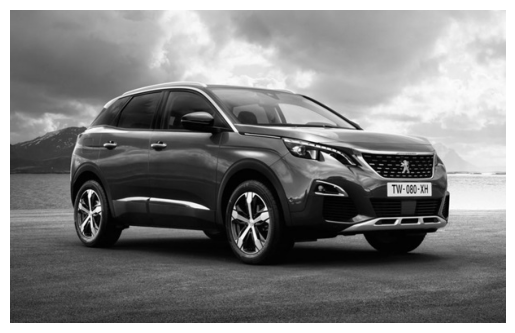

In [27]:
import cv2
from matplotlib import pyplot as plt


def displayImage(image, color_mode = None):
    plt.imshow(image, color_mode)
    plt.axis('off')
    
image_path = '../03.jpg'

bgr_image = cv2.imread(image_path, 0)
source_image = cv2.cvtColor(bgr_image.copy(), cv2.COLOR_BGR2RGB)

displayImage(source_image)

Smoothing grayscale image with Gaussian blur and displaying it.

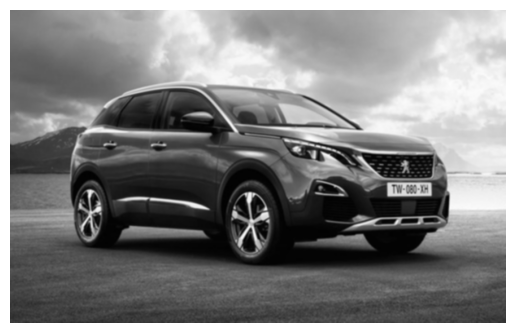

In [28]:
ksize = 3

smoothed_image = cv2.GaussianBlur(source_image.copy(), (ksize, ksize), 0)

displayImage(smoothed_image)

Applying Laplacian filter and displaying result.

Generally, the derivates of Black to White transitions are positive. In contrast, the White to Black transitions are negative, and hence it is highly recommended to choose a higher-order output datatype such as cv2.CV_64F and then convert the result to a uint8 type array to avoid missing any edges.

```cv2.convertScaleAbs(laplacian_filterred_image)``` is used to computing modulo of each pixel and convert to uint8 (0, 255) datatype. 

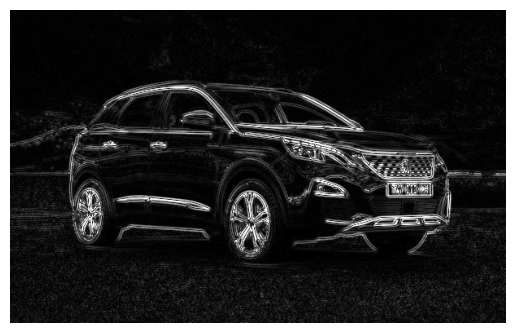

In [29]:
ddepth = cv2.CV_64F

laplacian_filterred_image = cv2.Laplacian(smoothed_image, ddepth, ksize=ksize)

res_image = cv2.convertScaleAbs(laplacian_filterred_image)

displayImage(res_image)